# Syracuse Crime Data Analysis

## Introduction:

	As a Syracuse University student and a resident in upstate NY, the health of my local communities is of great importance to me. The city of Syracuse consistently ranks as one of the most dangerous cities in New York, with a violent crime rate of around 891 incidents per 100,000 people, which is currently the third highest in the state. From my own personal experiences, I've noticed many Syracuse University students feel unsafe to venture beyond the confines of the campus. This is a major issue and as a community, we need to take actionable steps towards fixing this issue. Before we can do that though, we need to understand this problem. We need to understand the ins and outs of this problem; what time of day do we see the most crime? What time of the year is crime most common? Where in the city is crime most common? And more. These are questions that need to be answered before we can take any actionable steps towards fixing this issue and building a safer tomorrow.

## Data Summary:

	This report presents an exploratory data analysis of crime data spanning from 2020 to 2024. This analysis aims to identify patterns and provide key insights to improve public safety. The dataset that this analysis is based on consists of 40,151 records detailing crime incidents, categorized by type, time, and location.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
import geopandas as gpd
import contextily as ctx

In [3]:
conn = sqlite3.connect('crime_data.db')

query = ("""
        SELECT TIMESTART, DATEEND, CODE_DEFINED FROM crime_2024_2
        UNION ALL
        SELECT TIMESTART, DATEEND, CODE_DEFINED FROM crime_2024_1
        UNION ALL
        SELECT TIMESTART, DATEEND, CODE_DEFINED FROM crime_2023_2
        UNION ALL
        SELECT TIMESTART, DATEEND, CODE_DEFINED FROM crime_2023_1
        UNION ALL
        SELECT TIMESTART, DATEEND, "CODE_DEFINED" FROM crime_2022_2
        UNION ALL
        SELECT TIMESTART, DATEEND, CODE_DEFINED FROM crime_2022_1
        UNION ALL
        SELECT TIMESTART, DATEEND, CODE_DEFINED FROM crime_2021_2
        UNION ALL
        SELECT TIMESTART, DATEEND, CODE_DEFINED FROM crime_2021_1
        UNION ALL
        SELECT TIMESTART, DATEEND, CODE_DEFINED FROM crime_2020_2
        UNION ALL
        SELECT TIMESTART, DATEEND, CODE_DEFINED FROM crime_2020_1;
        """)

df = pd.read_sql_query(query, conn)

In [4]:
def toDate(date):
    date = date[:-12]
    try:
        date_object = datetime.strptime(date, "%Y/%m/%d")
        if(date_object.year >= 2020):
            return date_object
        else:
            return None
    except(ValueError, TypeError):
        try:
            date_object = datetime.strptime(date, "%m/%d/%Y")
            if (date_object.year >= 2020):
                return date_object
            else:
                return None
        except(ValueError, TypeError):
            return None


LARCENY (21%)
SIMPLE ASSAULT (15%)
CODE_DEFINED (12%)
CRIMINAL MISCHIEF (11%)
BURGLARY (8%)
AGGRAVATED ASSAULT (7%)
MV THEFT (5%)
OFFN AGAINST FAMILY (5%)
OTHER OFFENCES (12%)


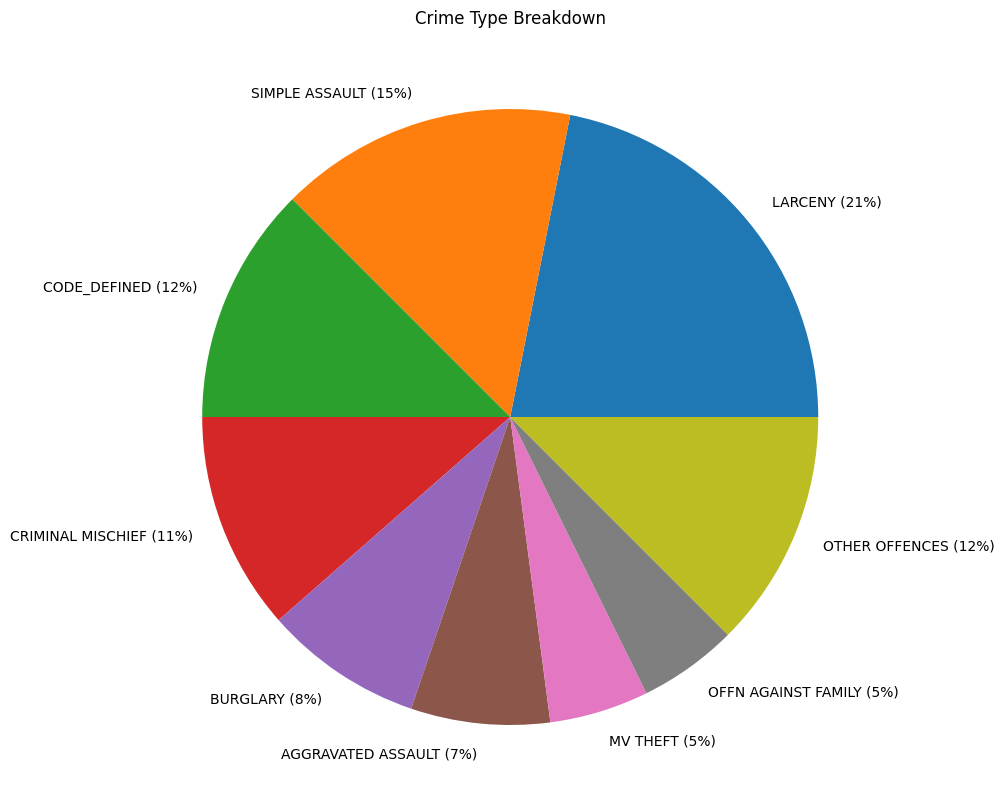

In [5]:
def toPercent(count, total):
    count = count / total
    count = count * 100
    return count


count = df['CODE_DEFINED'].value_counts()
column_total = count.sum()
count = count.apply(lambda x : toPercent(x,column_total))
misc_total = 0
for n in count:
    if n < 5:
        misc_total = misc_total + n

new_row = pd.Series([misc_total], index=["OTHER OFFENCES"])
count = pd.concat([count, new_row])
filtered_count = count[count > 5]
filtered_count = filtered_count.fillna(0).astype(int)


custom_labels = [f"{index} ({size}%)" for index, size in filtered_count.items()]

for n in custom_labels:
    print(n)

plt.figure(figsize=(15,10))
plt.title("Crime Type Breakdown")
plt.pie(filtered_count.values, labels=custom_labels)
plt.show()

## Observation:
The pie chart categorizes crimes into types, with the largest proportions being Larceny (21%), Simple Assault (20%), and Other Offences (15%).
## Analysis:
High Prevalence of Larceny: Theft-related crimes (Larceny) make up the largest category, indicating a need for measures like increased security for businesses and public education on theft prevention.
Assault-Related Crimes: Simple Assault (20%) is the second-most common type of crime, suggesting a need for interventions addressing interpersonal violence.
Other Offences: The 15% under "Other Offences" likely encompasses various smaller categories, requiring further breakdown to identify actionable patterns.
## Smaller Crime Types:
Criminal Mischief (14%): Vandalism and property damage.
Burglary (8%): Highlights the need for better home and business security systems.
Family and Aggravated Assault (7%): Indicates issues related to domestic violence.
Motor Vehicle Theft (5%): Suggests the importance of car security systems and public awareness.
## Recommendations:
Implement neighborhood watch programs and public safety campaigns to combat theft and vandalism.
Focus on community and school programs to address interpersonal violence and domestic issues.
Deploy targeted measures for vehicle theft prevention, such as parking security.


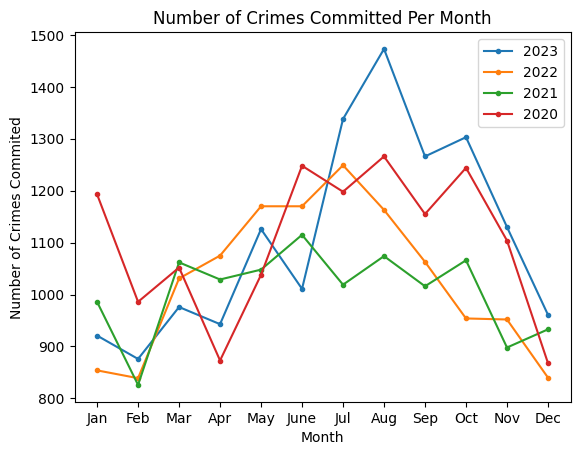

In [6]:
conn = sqlite3.connect('crime_data.db')
query = ("""
        SELECT DATEEND FROM crime_2023_1
        UNION ALL
        SELECT DATEEND FROM crime_2023_2;
        """)
df_2023 = pd.read_sql_query(query, conn)
query = ("""
        SELECT DATEEND FROM crime_2022_1
        UNION ALL
        SELECT DATEEND FROM crime_2022_2;
        """)
df_2022 = pd.read_sql_query(query, conn)
query = "SELECT DATEEND FROM crime_2022_2"
df_test = pd.read_sql_query(query, conn)

query = ("""
        SELECT DATEEND FROM crime_2021_1
        UNION ALL
        SELECT DATEEND FROM crime_2021_2;
        """)
df_2021 = pd.read_sql_query(query, conn)
query = ("""
        SELECT DATEEND FROM crime_2020_1
        UNION ALL
        SELECT DATEEND FROM crime_2020_2;
        """)
df_2020 = pd.read_sql_query(query, conn)

conn.close()

def toDate(date):
    date = date[:-12]
    try:
        date_object = datetime.strptime(date, "%Y/%m/%d")
        if(date_object.year >= 2020):
            return date_object
        else:
            return None
    except(ValueError, TypeError):
        try:
            date_object = datetime.strptime(date, "%m/%d/%Y")
            if (date_object.year >= 2020):
                return date_object
            else:
                return None
        except(ValueError, TypeError):
            return None


df_2023['DATEEND'] = df_2023['DATEEND'].apply(toDate)
df_2022['DATEEND'] = df_2022['DATEEND'].apply(toDate)
df_2021['DATEEND'] = df_2021['DATEEND'].apply(toDate)
df_2020['DATEEND'] = df_2020['DATEEND'].apply(toDate)


y_values_2023 = []
y_values_2022 = []
y_values_2021 = []
y_values_2020 = []
for month in range(1,13):
    y_values_2023.append(df_2023.loc[df_2023['DATEEND'].dt.month == month].count().iloc[0])
    y_values_2022.append(df_2022.loc[df_2022['DATEEND'].dt.month == month].count().iloc[0])
    y_values_2021.append(df_2021.loc[df_2021['DATEEND'].dt.month == month].count().iloc[0])
    y_values_2020.append(df_2020.loc[df_2020['DATEEND'].dt.month == month].count().iloc[0])


x_values = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


'''
jan = df.loc[df['DATEEND'].dt.month == 1].count().iloc[0]
feb = df.loc[df['DATEEND'].dt.month == 2].count().iloc[0]
mar = df.loc[df['DATEEND'].dt.month == 3].count().iloc[0]
apr = df.loc[df['DATEEND'].dt.month == 4].count().iloc[0]
may = df.loc[df['DATEEND'].dt.month == 5].count().iloc[0]
jun = df.loc[df['DATEEND'].dt.month == 6].count().iloc[0]
jul = df.loc[df['DATEEND'].dt.month == 7].count().iloc[0]
aug = df.loc[df['DATEEND'].dt.month == 8].count().iloc[0]
sep = df.loc[df['DATEEND'].dt.month == 9].count().iloc[0]
oct = df.loc[df['DATEEND'].dt.month == 10].count().iloc[0]
nov = df.loc[df['DATEEND'].dt.month == 11].count().iloc[0]
dec = df.loc[df['DATEEND'].dt.month == 12].count().iloc[0]


y_values = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]
'''

plt.plot(x_values, y_values_2023, marker='.', linestyle='-', label="2023")
plt.plot(x_values, y_values_2022, marker='.', linestyle='-', label="2022")
plt.plot(x_values, y_values_2021, marker='.', linestyle='-', label="2021")
plt.plot(x_values, y_values_2020, marker='.', linestyle='-', label="2020")

plt.title("Number of Crimes Committed Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes Commited")
plt.legend()

plt.show()

## Observation:
This line graph shows the number of crimes per day in a month. Crime counts fluctuate between 1,400 and 2,200 crimes, with notable dips toward the end of the month.
## Analysis:
There is no consistent trend throughout the month, but crimes seem to decrease after the mid-point and drop sharply toward the end of the month.
The decrease in crimes toward the end of the month might be due to reporting delays, administrative factors, or other external influences.


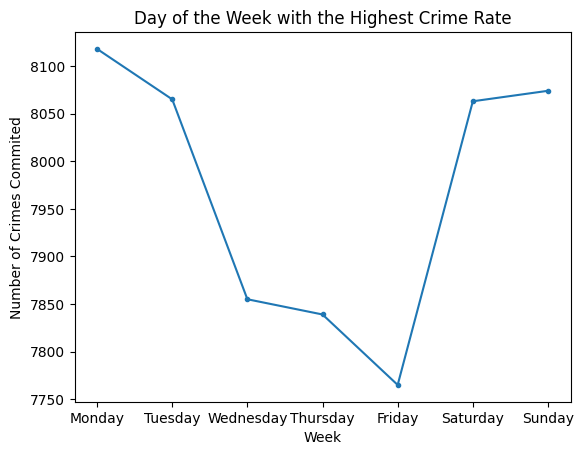

In [7]:

df['DATEEND'] = df['DATEEND'].apply(toDate)

mon = df.loc[df['DATEEND'].dt.dayofweek == 0].count().iloc[0]
tue = df.loc[df['DATEEND'].dt.dayofweek == 1].count().iloc[0]
wed = df.loc[df['DATEEND'].dt.dayofweek == 2].count().iloc[0]
thur = df.loc[df['DATEEND'].dt.dayofweek == 3].count().iloc[0]
fri = df.loc[df['DATEEND'].dt.dayofweek == 4].count().iloc[0]
sat = df.loc[df['DATEEND'].dt.dayofweek == 5].count().iloc[0]
sun = df.loc[df['DATEEND'].dt.dayofweek == 6].count().iloc[0]


x_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
y_values = [mon, tue, wed, thur, fri, sat, sun]

# Plot the data
plt.plot(x_values, y_values, marker='.', linestyle='-', label="2023")

plt.title("Day of the Week with the Highest Crime Rate")
plt.xlabel("Week")
plt.ylabel("Number of Crimes Commited")

plt.show()

## Observation:
This graph highlights the number of crimes committed on each day of the week. Monday has the highest number of crimes, while Thursday has the lowest.
## Analysis:
Monday's spike could be related to increased reporting of weekend incidents or the resumption of regular activities that contribute to higher crime reporting.
The lower crime rates on Thursday may be associated with reduced activity mid-week, before the weekend.


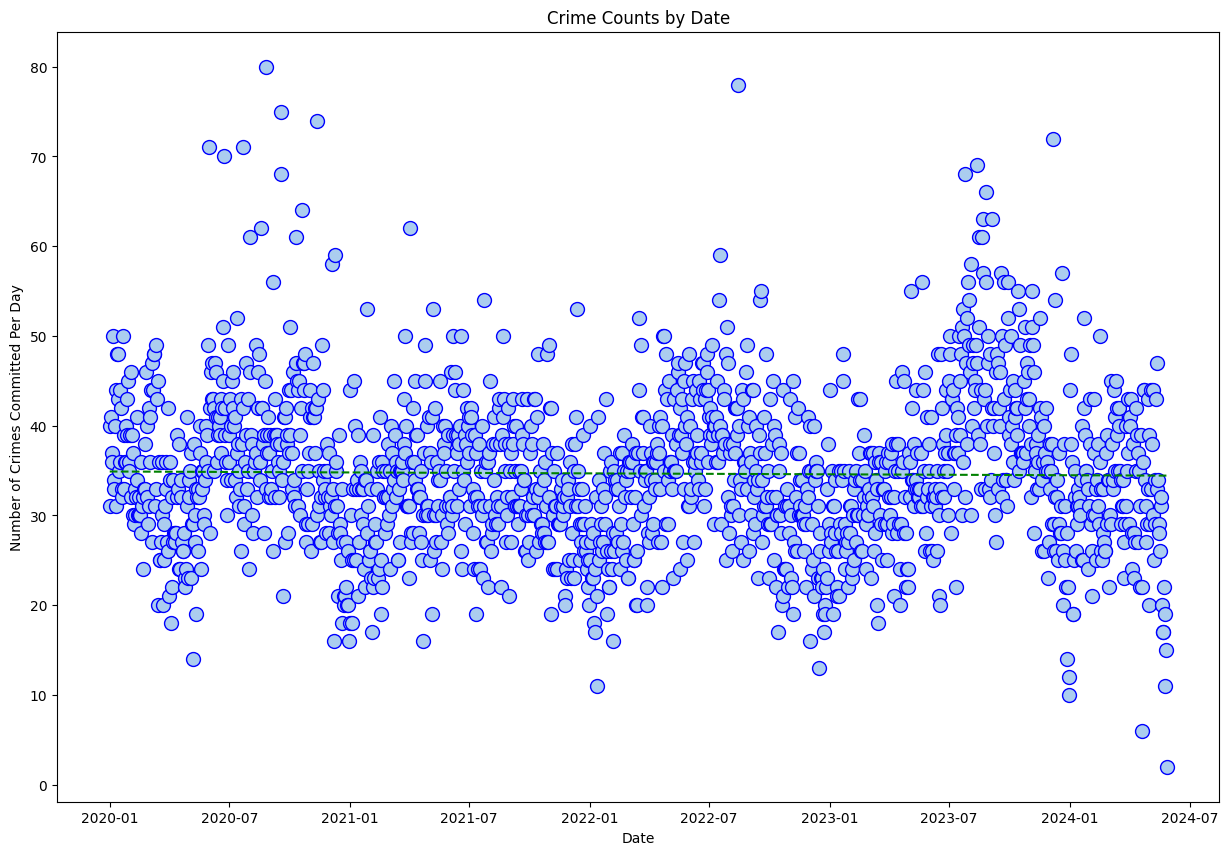

In [8]:
date_counts = df['DATEEND'].value_counts().sort_index()
dates = mdates.date2num(date_counts.index)

slope, intercept = np.polyfit(dates, date_counts.values, 1)
best_fit_line = slope * dates + intercept


# Plot
plt.figure(figsize=(15, 10))
plt.scatter(date_counts.index, date_counts.values, color='#abcdef', edgecolors='blue', s=100, marker='o')
plt.plot(date_counts.index, best_fit_line, label='Best Fit Line', color='Green', linestyle='--')




plt.ylabel("Number of Crimes Committed Per Day")
plt.xlabel("Date")
plt.title("Crime Counts by Date")

plt.savefig("crime_per_day1.png", dpi=300)
plt.show()

## Observation:
This scatter plot aggregates crime counts over multiple years, from 2020 to 2024. The data is spread evenly, with some spikes exceeding 70 crimes on certain days.
## Analysis:
There are no major deviations or trends over the years, indicating a relatively stable level of crime day-to-day.
The spikes might represent specific events, public holidays, or other factors that drive short-term increases in crime.


In [9]:
def toTime(military_time):
    try:
        military_time = int(military_time)
        military_time_str = f"{military_time:04d}"
        # Step 2: Convert it to a datetime object using strptime
        time_obj = datetime.strptime(military_time_str, "%H%M")

        # Step 3: Format it to regular time (12-hour format with AM/PM)
        regular_time = time_obj.strftime("%I:%M %p")
        return regular_time
    except(ValueError, TypeError):
        return None


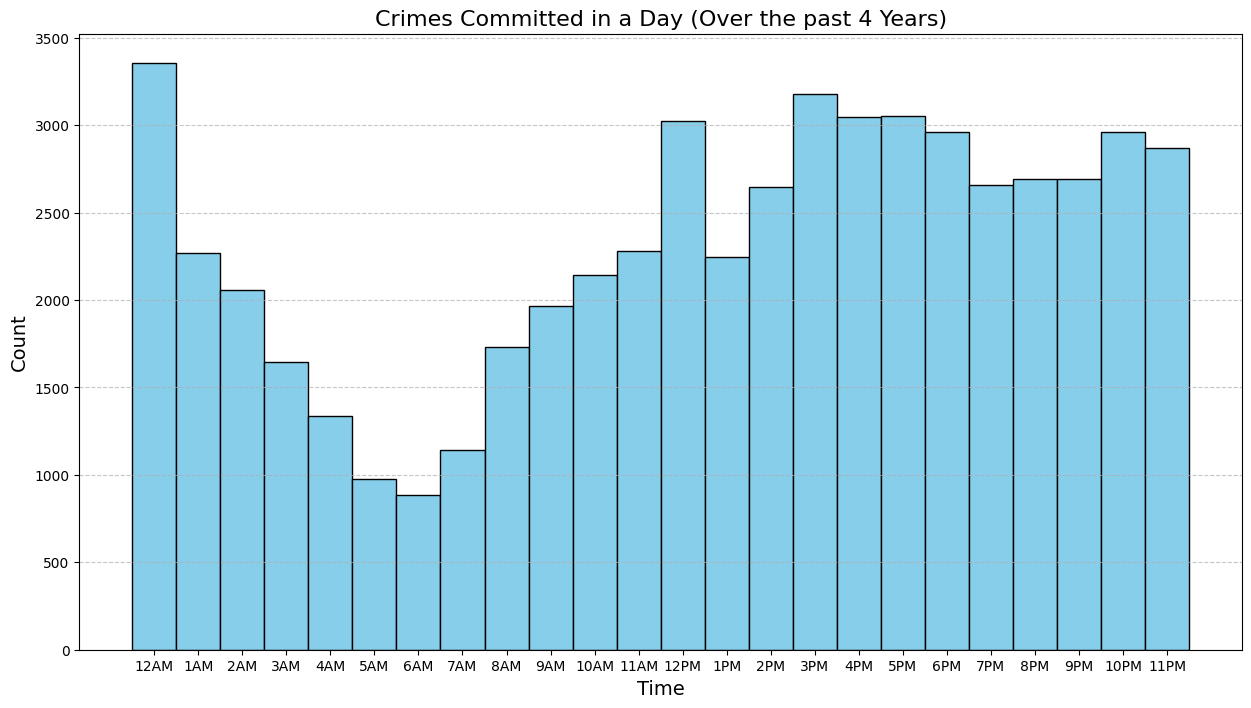

In [10]:
df["TIMESTART"] = df["TIMESTART"].apply(toTime)

df['TIMESTART'] = pd.to_datetime(df['TIMESTART'], format='%I:%M %p')

df['HOUR'] = df['TIMESTART'].dt.hour



plt.figure(figsize=(15, 8))
plt.hist(df['HOUR'], bins=range(0, 25), edgecolor='black', align='left', color='skyblue')

# Customize the plot
plt.title('Crimes Committed in a Day (Over the past 4 Years)', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(0, 24), ['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'])  # Ensure all hours (0-23) are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

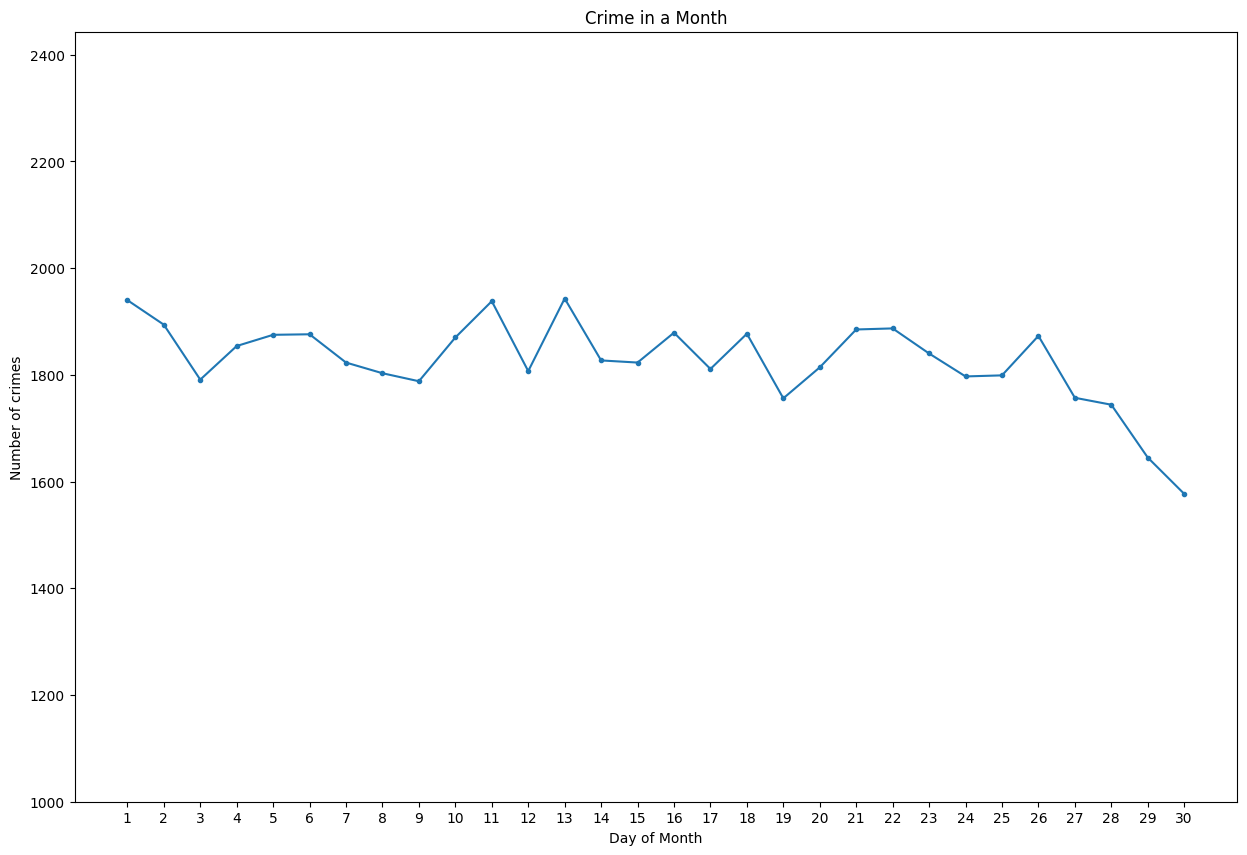

In [11]:
date_counts = df['DATEEND'].dt.day.value_counts().sort_index()
date_counts = date_counts[date_counts.index <= 30]



plt.figure(figsize=(15,10))
plt.plot(date_counts.index, date_counts.values, marker='.')
plt.ylim(1000, max(date_counts.values) + 500)
plt.xticks(range(1,31))
plt.title("Crime in a Month")
plt.xlabel("Day of Month")
plt.ylabel("Number of crimes")

plt.show()

## Observation:
This line graph represents the number of crimes committed on each day of a specific month. The crime counts fluctuate between 1,400 and 2,200, with a general downward trend toward the end of the month.
## Analysis:
Fluctuations in Daily Crime: The daily crime rates show noticeable peaks and troughs, indicating no consistent pattern day-to-day within the month.
End-of-Month Drop: The sharp decline toward the end of the month may indicate reporting or administrative delays. Alternatively, this could suggest lower activity or enforcement measures.
Mid-Month Stability: The crime rates in the middle of the month appear more consistent, with smaller variations between days.
Recommendations: Investigate why crime rates drop at the end of the month, possibly by examining reporting procedures or seasonal variations.

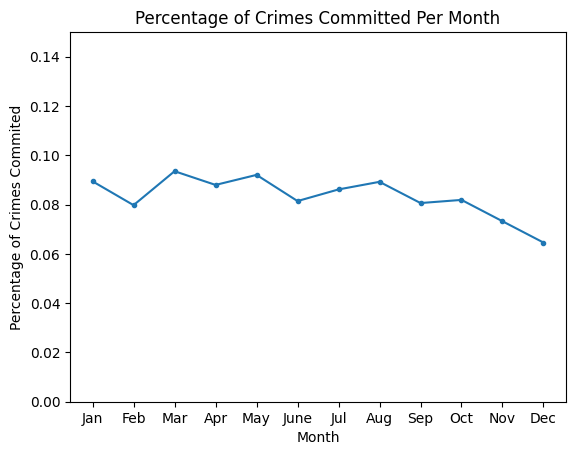

In [12]:
y_values = []
for month in range(1,13):
    y_values.append(df.loc[df['DATEEND'].dt.month == month].count().iloc[0])


x_values = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


total_crimes = 0
for x in y_values:
    total_crimes = total_crimes + x
y_percentages = []
for x in y_values:
    x = x / total_crimes
    y_percentages.append(x)

plt.plot(x_values, y_percentages, marker='.', linestyle='-')
plt.ylim(0, 0.15)
plt.title("Percentage of Crimes Committed Per Month")
plt.xlabel("Month")
plt.ylabel("Percentage of Crimes Commited")

plt.show()

## Observation:
This line graph shows the percentage of crimes committed in each month as a fraction of the total for the year. The percentages hover between 8% and 12%, with a slight downward trend toward the later months of the year.
## Analysis:
Spring and Early Summer Peaks: The months of March, April, and May show higher percentages of crimes, possibly linked to increased activities and favorable weather conditions that contribute to criminal opportunities.
Late-Year Decline: The drop in percentages during November and December could be due to colder weather, holiday-related activities, or fewer interactions in public spaces.
Consistency Mid-Year: The months of June through October maintain a relatively stable percentage, suggesting steady activity during the late spring and summer.

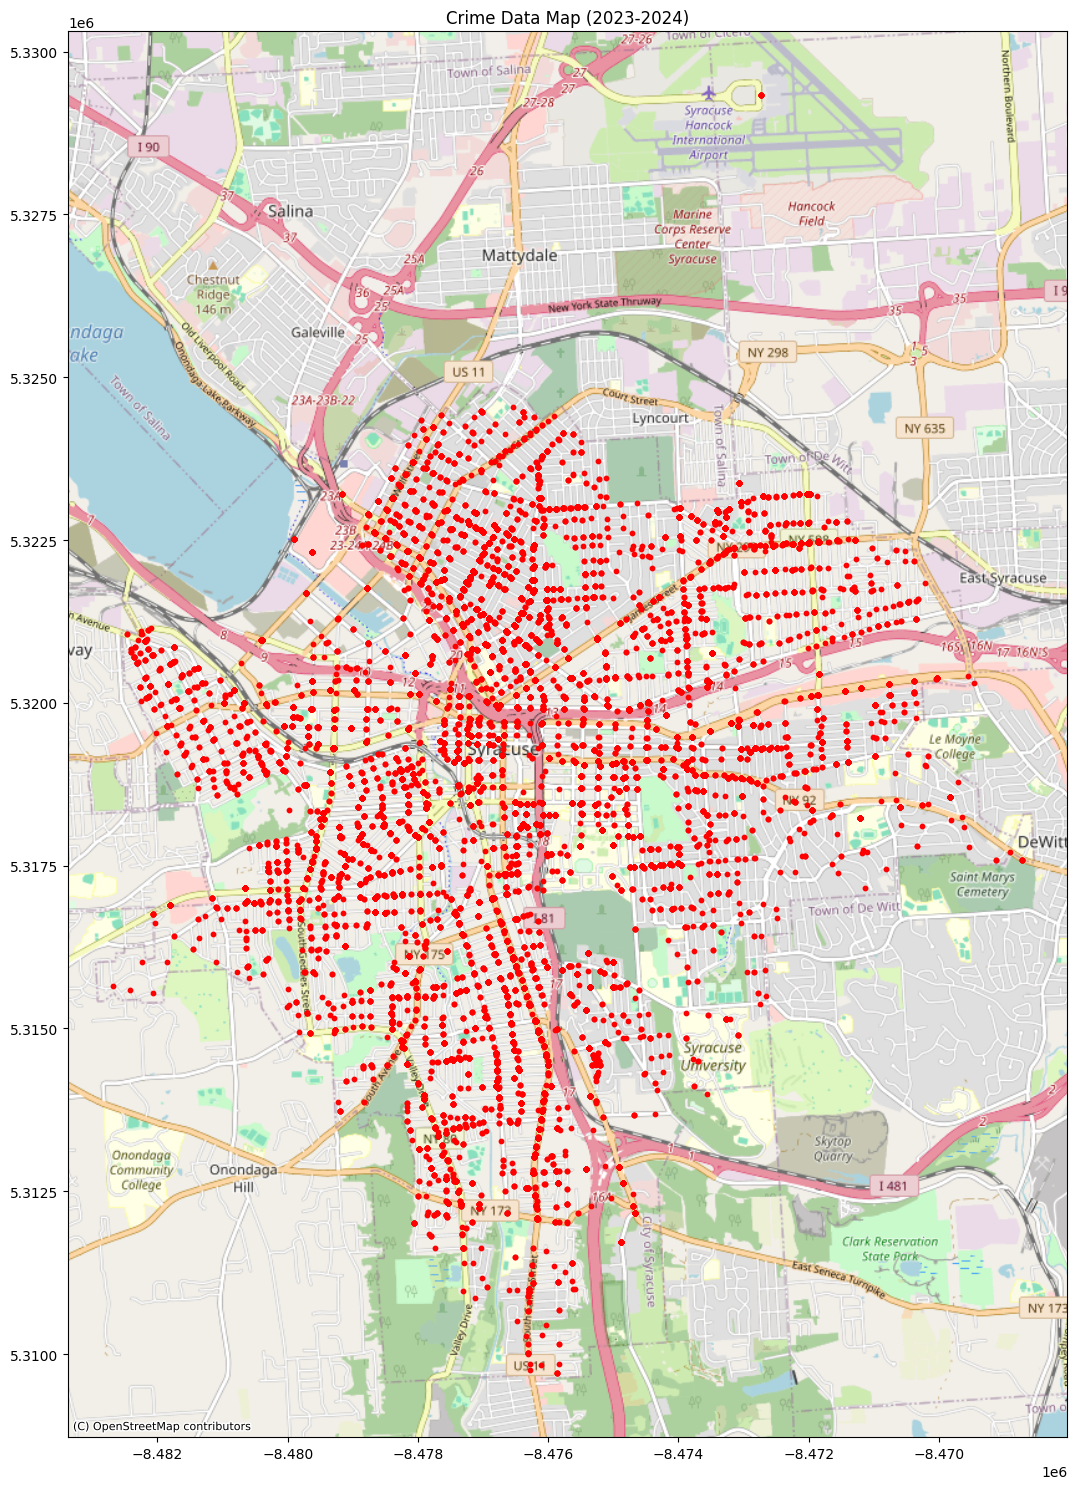

In [13]:
conn = sqlite3.connect('crime_data.db')
query = ("""
        SELECT LONG, LAT FROM crime_2024_2
        UNION ALL
        SELECT LONG, LAT FROM crime_2024_1
        UNION ALL
        SELECT LONG, LAT FROM crime_2023_2
        UNION ALL
        SELECT LONG, LAT FROM crime_2023_1;
        """)

df_map = pd.read_sql_query(query, conn)
conn.close()

df_map["LONG"] = pd.to_numeric(df_map["LONG"], errors="coerce")
df_map["LAT"] = pd.to_numeric(df_map["LAT"], errors="coerce")

points = gpd.points_from_xy(df_map["LONG"], df_map["LAT"], crs="EPSG:4326")
gdf = gpd.GeoDataFrame(df_map, geometry=points)

# Reproject to Web Mercator (EPSG:3857)
gdf = gdf.to_crs(epsg=3857)
map = gpd.GeoDataFrame (df_map, geometry=points)

fig, ax = plt.subplots(figsize=(20, 15))  # Adjust width and height
gdf.plot(ax=ax, aspect=1, color="red", markersize=10)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Add basemap

plt.title("Crime Data Map (2023-2024)")
plt.tight_layout()
plt.show()



## Hotspots Identified:
Crime activity is concentrated in urban areas and high-traffic zones, particularly in downtown regions, near commercial hubs, and along major roadways.
Sparse Areas: The outskirts and suburban regions show significantly fewer crimes, suggesting a lower density of incidents in these areas.
## Possible Factors:
High population density in urban areas may lead to increased opportunities for crime.
The presence of businesses and public facilities might attract criminal activity.
Public transportation routes could contribute to higher crime rates along specific corridors.
## Recommendations:
Focus law enforcement efforts in the identified hotspots.
Install more surveillance cameras and street lighting in high-crime areas.
Conduct community outreach programs in these zones to raise awareness and improve safety.


## Conclusion
This analysis identifies key areas for action to reduce crime and improve public safety. Geospatial data highlights urban centers and high-traffic areas as major crime hotspots, suggesting the need for targeted interventions, such as deploying additional law enforcement, installing surveillance cameras, and improving lighting in these zones. Community engagement programs, such as neighborhood watch groups, can also play a vital role in deterring crime in these areas.
Temporal trends reveal that crime rates peak during spring and summer months, particularly in March, April, and August, which indicates the importance of allocating resources seasonally. Law enforcement presence should be increased during these months, while community programs and public awareness campaigns can help address the root causes of these spikes. The end-of-month and end-of-year declines in crime suggest that administrative factors or behavioral changes may influence reporting, which can be addressed by ensuring consistent reporting mechanisms.
The breakdown of crime types emphasizes the need to combat larceny and simple assault, which together account for a significant proportion of crimes. Theft prevention programs, public education on securing personal and business property, and partnerships with local businesses can help reduce larceny. Simultaneously, addressing interpersonal violence through community education and conflict resolution programs can reduce assaults.
